In [297]:
import pandas as pd 
import numpy as np 

### Data Details

In [298]:
df = pd.read_csv("Heart_Disease_Dataset.csv")
display(df)
print("the shape of dataset is \033[1m" , df.shape)

null_values = df.isnull()  
null_counts = null_values.sum()
print("\033[0mcount of null values for each column " , null_counts)
print("So there is \033[1m no null values \033[0m in the dataset.")
df["temp"] = np.ones(df.shape[0])
grouped = df.groupby("target")['temp'].sum()
display(grouped)
df = df.drop('temp', axis=1)
print("So dataset is \033[1mquite balanced\033[0m")

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


the shape of dataset is  (1190, 12)
count of null values for each column  age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
So there is  no null values  in the dataset.


target
0    561.0
1    629.0
Name: temp, dtype: float64

So dataset is quite balanced


### ploting Age and Gender for each calss

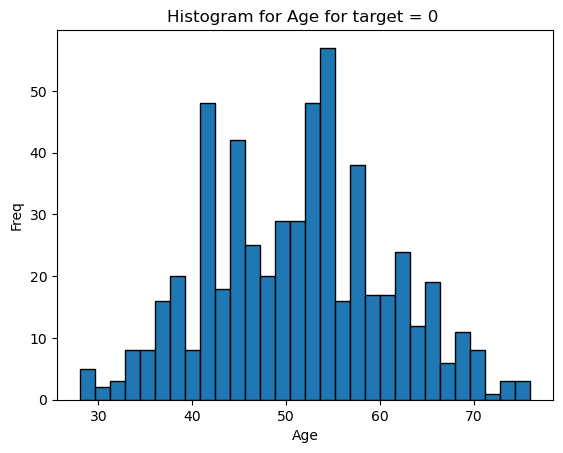

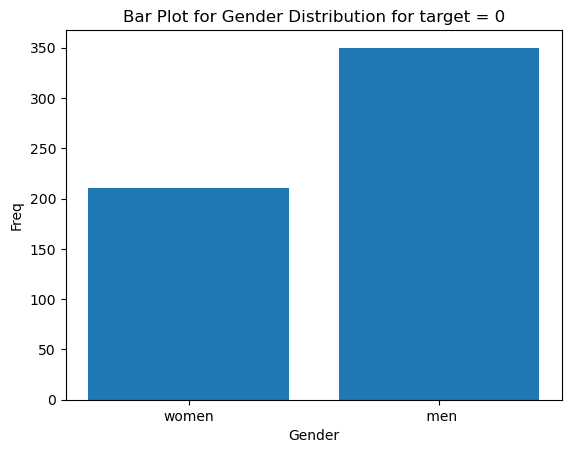

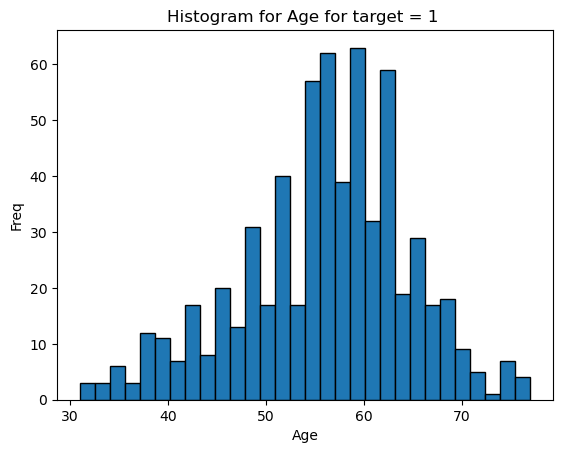

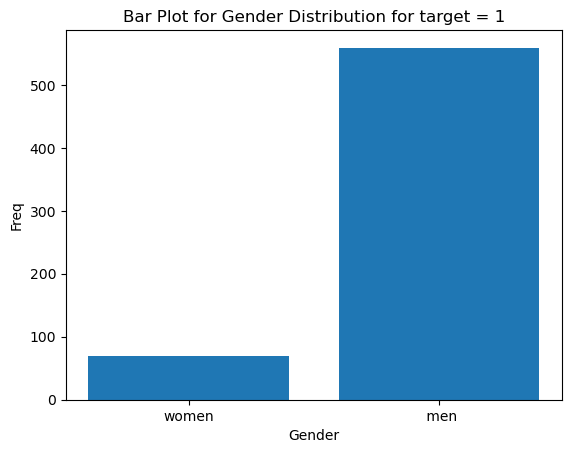

In [299]:
import matplotlib.pyplot as plt

for i in range(2):
    
    # Age
    df1 = df[df["target"] == i]
    data = list(df1["age"])
    plt.hist(data, bins=30, edgecolor='black')  
    plt.title(f'Histogram for Age for target = {i} ')
    plt.xlabel('Age')
    plt.ylabel('Freq')
    plt.show()
    # Gender
    my_list = list(df1["sex"])
    ls = [my_list.count(0), my_list.count(1) ] 
    plt.bar( ["women", " men"],ls )
    plt.xlabel('Gender')
    plt.ylabel('Freq')
    plt.title(f'Bar Plot for Gender Distribution for target = {i}')
    plt.show()

### Z test and data outliters dropouts

In [332]:
from scipy import stats
new_df = df.copy()

for col in ["age","resting bp s","cholesterol","oldpeak", "max heart rate"]: 
    new_df[f"z_score_{col}"] = np.abs(stats.zscore(new_df[col]))
    new_df = new_df[new_df[f"z_score_{col}"] < 3]
print(new_df.shape)
print("After the Z test 1162 remain so 28 (outliers) rows Drop out by the Z test ")
new_df = new_df.drop(columns=["z_score_age", "z_score_resting bp s","z_score_cholesterol",
                      "z_score_oldpeak","z_score_max heart rate"  ])


(1162, 17)
After the Z test 1162 remain so 28 (outliers) rows Drop out by the Z test 


In [333]:
new_df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


### Data Normalization

In [334]:
for col in ["age","resting bp s","resting bp s","cholesterol","max heart rate","oldpeak"]:
    new_df[col] = (new_df[col] - min(new_df[col])) / (max(new_df[col]) -  min(new_df[col]))

In [335]:
display(new_df)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.571429,0.588595,0,0,0.777778,0,0.333333,1,0
1,0.428571,0,3,0.761905,0.366599,0,0,0.659259,0,0.500000,2,1
2,0.183673,1,2,0.476190,0.576375,0,1,0.229630,0,0.333333,1,0
3,0.408163,0,4,0.552381,0.435845,0,0,0.303704,1,0.583333,2,1
4,0.530612,1,3,0.666667,0.397149,0,0,0.407407,0,0.333333,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.346939,1,1,0.285714,0.537678,0,0,0.481481,0,0.533333,2,1
1186,0.816327,1,4,0.609524,0.393075,1,0,0.548148,0,0.900000,2,1
1187,0.591837,1,4,0.476190,0.266802,0,0,0.355556,1,0.533333,2,1
1188,0.591837,0,2,0.476190,0.480652,0,2,0.792593,0,0.333333,2,1


In [375]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(new_df.loc[:, "age":"ST slope"], new_df["target"], test_size=0.3)

# Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# RBF Kernel
svm_rbf = SVC(kernel='rbf', gamma= 0.1)
svm_rbf.fit(X_train, y_train)

# Polynomial Kernel
svm_poly = SVC(kernel='poly', degree = 4)
svm_poly.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)


accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print("Accuracy (Linear Kernel):", accuracy_linear)
print("Accuracy (RBF Kernel):", accuracy_rbf)
print("Accuracy (Polynomial Kernel):", accuracy_poly)

Accuracy (Linear Kernel): 0.8567335243553008
Accuracy (RBF Kernel): 0.8653295128939829
Accuracy (Polynomial Kernel): 0.8767908309455588


### Parameters Tunings

In [376]:
rbf_acc_dict =dict()
poly_acc_dict =dict()
linear_acc_dict =dict()


gammas = [ 0.001, 0.01, 0.1, 0.2, 0.3 ]
Cs =  [ 1, 10, 100 ]
degrees= [2, 3, 4, 5, 6, 7, 8, 9, 10]

### Achieve max Accuracy by parameeter tunning.

for gamma in gammas: 
    for degree in degrees: 
        for c in Cs: 
            # RBF Kernel
            svm_rbf = SVC(kernel='rbf', gamma= gamma, C = c, degree=degree )
            svm_rbf.fit(X_train, y_train)

            # Polynomial Kernel
            svm_poly = SVC(kernel='poly', gamma= gamma, C = c, degree=degree)
            svm_poly.fit(X_train, y_train)
            
            # leanear Kernel
            svm_linear = SVC(kernel='poly', gamma= gamma, C = c, degree=degree)
            svm_linear.fit(X_train, y_train)
            
            
            y_pred_rbf = svm_rbf.predict(X_test)
            y_pred_poly = svm_poly.predict(X_test)
            y_pred_linear = svm_linear.predict(X_test)
            
            
            accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
            accuracy_poly = accuracy_score(y_test, y_pred_poly)
            accuracy_linear = accuracy_score(y_test, y_pred_linear)
            
            
            rbf_acc_dict[f"C = {c}, degree = {degree}, gamma= {gamma}" ] = accuracy_rbf
            poly_acc_dict[f"C = {c}, degree = {degree}, gamma= {gamma}" ] = accuracy_poly
            linear_acc_dict[f"C = {c}, degree = {degree}, gamma= {gamma}" ] = accuracy_linear

### Maximum accuracy by RBF Kernel 
max_rbf_key = max(rbf_acc_dict, key=rbf_acc_dict.get)
print("The Maximum accuracy for RBF kernel is with params",max_rbf_key, "is", rbf_acc_dict[max_rbf_key])      
            
### Maximum accuracy by Poly Kernel
max_poly_key = max(poly_acc_dict, key=poly_acc_dict.get)
print("The Maximum accuracy for poly kernel is with params ", max_poly_key,"is", poly_acc_dict[max_poly_key])

### Maximum accuracy by Linear Kernel
max_linear_key = max(linear_acc_dict, key=linear_acc_dict.get)
print("The Maximum accuracy for Linear kernel with params ", max_linear_key, "is", linear_acc_dict[max_linear_key])



The Maximum accuracy for RBF kernel is with params C = 100, degree = 2, gamma= 0.1 is 0.9054441260744985
The Maximum accuracy for poly kernel is with params  C = 100, degree = 3, gamma= 0.1 is 0.8939828080229226
The Maximum accuracy for Linear kernel with params  C = 100, degree = 3, gamma= 0.1 is 0.8939828080229226


#### Accuracy had reported so for F1 score , Percision and Recall we have

In [378]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Linear Kernel
svm_linear = SVC(kernel='linear',C = 100, degree = 3, gamma= 0.1)
svm_linear.fit(X_train, y_train)

# RBF Kernel 
svm_rbf = SVC(kernel='rbf', C = 100, degree = 2, gamma= 0.1)
svm_rbf.fit(X_train, y_train)

# Polynomial Kernel
svm_poly = SVC(kernel='poly', C = 100, degree = 3, gamma= 0.1)
svm_poly.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)


f1_rbf = f1_score(y_test, y_pred_rbf)
f1_poly = f1_score(y_test, y_pred_poly)
f1_linear = f1_score(y_test, y_pred_linear)



precision_rbf = precision_score(y_test, y_pred_rbf)
precision_poly = precision_score(y_test, y_pred_poly)
precision_linear = precision_score(y_test, y_pred_linear)



recall_rbf = recall_score(y_test, y_pred_rbf)
recall_poly = recall_score(y_test, y_pred_poly)
recall_linear = recall_score(y_test, y_pred_linear)





### rbf 
print(f"For RBF kernel we have \n F1 score = {f1_rbf} , \n precesion = {precision_rbf} and \n recall = {recall_rbf}")


### Polynominal 
print(f"For Polynominal kernel we have \n F1 score = {f1_poly} ,\n  precesion = {precision_poly} and \n recall = {recall_poly}")


### rbf 
print(f"For Linear kernel we have \n F1 score = {f1_linear} , \n precesion = {precision_linear} and \n recall = {recall_linear}")


For RBF kernel we have 
 F1 score = 0.9168765743073047 , 
 precesion = 0.8921568627450981 and 
 recall = 0.9430051813471503
For Polynominal kernel we have 
 F1 score = 0.9038961038961039 ,
  precesion = 0.90625 and 
 recall = 0.9015544041450777
For Linear kernel we have 
 F1 score = 0.8756476683937824 , 
 precesion = 0.8756476683937824 and 
 recall = 0.8756476683937824
